# Image Augmentation Demo
This shows a demo of image augmentation and the resulting images. It creates one without augmentation and one with augmentation to show the difference.

In [2]:
from glob import glob
from hyperspectral_image_generator import hyperspectral_image_generator, hyperspectral_image_generator_jp2
import matplotlib.pyplot as plt

In [2]:
# variables
path_to_images = './images_for_notebook'
batch_size = 4
class_indices = {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3}

In [7]:
no_augmentation_parameters = {'flip': False,
                            'zoom': 1.0,
                            'shift': 0.0,
                            'rotation': 0.0,
                            'sheer': 0.0,
                            'noising': None}
augmentation_parameters = {'flip': True,
                            'zoom': 1.2,
                            'shift': 0.1,
                            'rotation': 10.0,
                            'sheer': 0.01,
                            'noising': None}

In [8]:
image_files = glob(path_to_images + "/**/*.tif")
print(image_files)

['./images_for_notebook\\AnnualCrop\\AnnualCrop_1.tif', './images_for_notebook\\Forest\\Forest_3.tif', './images_for_notebook\\HerbaceousVegetation\\HerbaceousVegetation_7.tif', './images_for_notebook\\Highway\\Highway_1.tif']


In [9]:
noaug_image_generator = hyperspectral_image_generator(image_files, class_indices,
                                                batch_size=batch_size,
                                                image_mean='image_mean_std.txt',
                                                rotation_range=no_augmentation_parameters['rotation'],
                                                horizontal_flip=no_augmentation_parameters['flip'],
                                                vertical_flip=no_augmentation_parameters['flip'],
                                                speckle_noise=no_augmentation_parameters['noising'],
                                                shear_range=no_augmentation_parameters['sheer'],
                                                scale_range=no_augmentation_parameters['zoom'],
                                                transform_range=no_augmentation_parameters['shift']
                                                )
aug_image_generator = hyperspectral_image_generator(image_files, class_indices,
                                                batch_size=batch_size,
                                                image_mean='image_mean_std.txt',
                                                rotation_range=augmentation_parameters['rotation'],
                                                horizontal_flip=augmentation_parameters['flip'],
                                                vertical_flip=augmentation_parameters['flip'],
                                                speckle_noise=augmentation_parameters['noising'],
                                                shear_range=augmentation_parameters['sheer'],
                                                scale_range=augmentation_parameters['zoom'],
                                                transform_range=augmentation_parameters['shift']
                                                )

(4, 64, 64, 13)


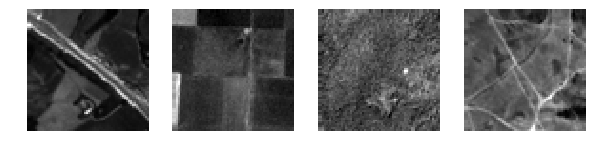

In [10]:
# No augmentation case
data = next(noaug_image_generator)
images = data[0]
print(images.shape)
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(images[idx, :, :, 1], cmap='gray')
    ax.axis('off')
plt.show()

In [11]:
images[idx, :, :, 1]

array([[ 8.32308592,  8.32308592,  8.40107279, ...,  7.13378609,
         6.75684953,  6.83483641],
       [ 8.32308592,  8.32308592,  8.40107279, ...,  7.13378609,
         6.75684953,  6.83483641],
       [ 8.62853451,  8.62853451,  8.53754982, ...,  7.06879703,
         6.87382984,  6.79584297],
       ...,
       [ 9.9933048 ,  9.9933048 ,  9.96081027, ..., 10.16227636,
         9.44739668,  9.70085402],
       [ 9.55137918,  9.55137918,  9.41490215, ..., 10.09078839,
         9.33041637,  9.22643388],
       [ 9.12245138,  9.12245138,  8.47905967, ...,  9.70735293,
         9.64886278,  9.45389559]])

(4, 64, 64, 13)


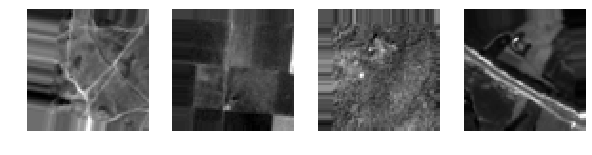

In [7]:
# Augmentation case
data = next(aug_image_generator)
images = data[0]
print(images.shape)
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(images[idx, :, :, 1], cmap='gray')
    ax.axis('off')
plt.show()

# Extraction from tiles
The JP2 generator avoids the problems with the above generator by sampling directly from the Satellite tiled images. It takes an input with the folder containing the JP2 images and a shape file that contains centroids of the data points. The image shows an example from fields surrounding Orange river, South Africa. Source from https://zindi.africa

<img src="images_for_notebook/jp2_generator.png" style="width:800px">

In [3]:
class_indices_column = 'Crop_Id_Ne'
shape_file = "./shape_file/train_reprojected_centroid.shp"
path_to_images = './data_jp2'
image_files = glob(path_to_images + "/*.jp2")
batch_size = 4
augmentation_parameters = {'flip': True,
                            'zoom': 1.2,
                            'shift': 0.1,
                            'rotation': 10.0,
                            'sheer': 0.01,
                            'noising': 0.001}
print(image_files)


['C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170101.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170131.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170210.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170312.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170322.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170531.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170620.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170710.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170715.jp2', 'C:\\Users\\laptomon\\Documents\\python_keras\\zindi\\farming\\data\\train_large\\20170804.jp2', 'C:\\Users\\laptomon\\Documen

In [4]:
jp2_image_generator = hyperspectral_image_generator_jp2(image_files, shape_file, class_indices_column,
                                                batch_size=batch_size,
                                                image_mean='jp2_image_mean_std.txt',
                                                rotation_range=augmentation_parameters['rotation'],
                                                horizontal_flip=augmentation_parameters['flip'],
                                                vertical_flip=augmentation_parameters['flip'],
                                                speckle_noise=augmentation_parameters['noising'],
                                                shear_range=augmentation_parameters['sheer'],
                                                scale_range=augmentation_parameters['zoom'],
                                                transform_range=augmentation_parameters['shift'],
                                                crop_size=[96,96]
                                                )

c:\users\laptomon\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(4, 96, 96, 13)


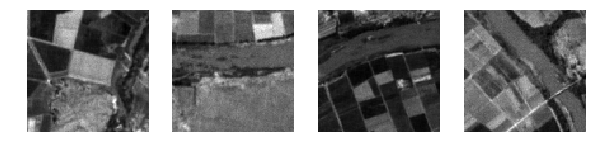

In [5]:
# JP2 case
data = next(jp2_image_generator)
images = data[0]
print(images.shape)
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(images[idx, :, :, 1], cmap='gray')
    ax.axis('off')
plt.show()